# Predicting Artist Success
### An exploratory data analysis of 95 monthly playlists

In [1]:
# I am using the Anaconda distribution - these are two additional libraries I used
!pip install spotipy
!pip install pytrends

In [2]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2

market = [ "AD", "AR", "AT", "AU", "BE", "BG", "BO", "BR", "CA", "CH", "CL", "CO", "CR", "CY", 
      "CZ", "DE", "DK", "DO", "EC", "EE", "ES", "FI", "FR", "GB", "GR", "GT", "HK", "HN", "HU", 
      "ID", "IE", "IS", "IT", "JP", "LI", "LT", "LU", "LV", "MC", "MT", "MX", "MY", "NI", "NL", 
      "NO", "NZ", "PA", "PE", "PH", "PL", "PT", "PY", "SE", "SG", "SK", "SV", "TH", "TR", "TW", 
      "US", "UY", "VN" ]

keyFile = open('keys.txt', 'r')
CLIENT_ID = keyFile.readline().rstrip()
CLIENT_SECRET = keyFile.readline().rstrip()
keyFile.close()

credentials = oauth2.SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [161]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

In [162]:
from datetime import datetime

### Retrieving List of Spotify Playlists
* I used the `user_playlists` Spotify API endpoint to get a list of my playlists, then cleaned this up to just include my monthly "Favorites" playlists I've made since December 2011

In [4]:
monthly_playlists = ['1zVU8QsUGupT48ru47XkSX', '2jqkm6oN8NuoyheeCGn1dW', '1IBaZXrjWRH0uIAICuXbug', '3k2WrmQcLlzqDgYs4Pz6Rq', '5Ogn4xEGXmaCiASE43iglB', '5FqNVQADrTaLUnH6WZD3d5', '4eCAbbJC316zcuE2SlvAmE', '6PsUVlhWBKSsOYiMdUpBA0', '3u9zWhsKZ39ZsJaACBv1zJ', '69dvMoS9V0Ft4sVDSCgEah', '5enHLbAS7YVQmMnuzQaXZk', '5KM1eGieX5kDfOnKeZdGWr', '0fRNCOVaEQpxbRHUx8XjOZ', '2jeDeYTktNp9hrdYQ1jog6', '2juUvvmGcM1AmBE5g7yzRE', '6Yt8zd2pEuPpFqer5Oz8OY', '7gctmDaRoGCYCqz3JhqdH2', '63EuI8vKEcf306VZ54ALCp', '4SferHMntxKEFGYRWgoyty', '4Smiymcx4vLxFSwPwMbZpj', '3NJvewRQT1pW2Rkj1NPNoc', '2ubZ6ldrqlqKbjtMJh5Asr', '1oeuCaQgprimCOayDowdDg', '6NE18ZyRVC3D28rMfWWcKO', '4UskJGQKKDtKXxsNFjYYZq', '6BobCQLX7G2nUOD0hiAFaD', '1WBI3D8fKy8W5OXOGbxKJB', '7AqmMbOAkQmqkdlbkGQuBB', '3U8gn6Hr4hGOhiFTT3Btim', '6K6v2nr5iiGmSQPfCG5run', '5jDjb9StuLLfy8aewcKrOT', '4FDPiojZrIzwxe8yFrYWfB', '0cnQC5Uj7mkfC09wl2V7YW', '1BnhWGhMcIT7OcgOi5A2AX', '2pMvq0DbOeuMJHQLTHMrEk', '3wn6TQXzBmPz83jiXAQ2O5', '6iXiVRb1L6YcHCpno6Oscq', '19bsqlA1BgfhGQLpyy8YfQ', '48gvLCM1cwciuzvnRTvZEH', '1VHFb1pvllvxAH5jsMaV6e', '0OpFWMBc7zQHFjwt1zfQ6T', '71KpNTa8UhM7rVExjaP2Of', '0OQfj3Cwc1fHtQ6phs2G9o', '6lCvFUfm8BV7Rm6IPJs4rP', '6Qb6TxT9lP3c4DeHTELhgh', '6EFJydvGTvSPVXVKhs6oYh', '0wM7jG2jCgUM2X8L9kMYBK', '65tcjNyhQdqxDl8BjAZILe', '1AFyTfrwytNNcTPUfFJeMD', '7a9iowtkNhsT69tKIuEgWQ', '37QJgBF1MdnBh86fhSyJkH', '241tw97H0XJHnMv3zQk1JK', '4Qm5zSOJ1bSJhE7plr2hAn', '3D2cdZRu7ySb2Nw9THzDQM', '412AGB1ZyuSE6o00TfpVgj', '2CXoNN78UkZwvnNvmy5ffw', '3t4DT9ZauORWwgbXPzcjTQ', '17DLMsK2h1lxzbhbFE7VjB', '3q9KKTxPQDqnVscd0pwmuW', '6DQr4Cbf0qCbLR5mchwTZ1', '4vba7hnYBZNmdUaiMxsggL', '5RFdSKyOAhgAOSJpnu8dKs', '3qDCFh6oMaOMivLeNBCkIm', '51jI2VTwzOUXcNEXtfQ2Lx', '6gJEympvFa4Mde1RbJ55cv', '4147fRtlDcqjfxv0sMrp8l', '2pkRbETjom7aYlRtfAEqsz', '0Twg2Wt5Lrh6S8Sb6tBOdA', '0FZeEIi6EI4GTUUmyVDXFC', '4UgpevpEG5YEd75SKcQzbf', '5CWdpdlU2NP6q4WWiUIxfw', '2YHs8t8O7zsqqG76Q6ztQt', '5jp4kJnzsDQ8qqQkZdeFX4', '3Y5nZSdwRfDVO0WLwvBQ1x', '0c8BCbSajTMILWdl3Ldk3F', '59KkIvF5fAX7gQogtY4pDR', '6fjfy19BAfJlOzLcRK314E', '0Yu7XSPtsOWaHvNQfHvN0n', '3LzkcX1I1t6d5CSIKWhpr8', '4bu0emkoXLfgO4Y7KGsgNM', '7jXW8MtGykTpOFClSTcKAg', '6tjVSLwhozBRDLONEnNa9w', '0UsDMdm9zm18AXywnxLGGJ', '5DtlNesPUmHmOoSW3LrOQh', '0JQy7fPJmZr2rmswgLzQ24', '3AfpYzcHYx5QUHihU3EnzD', '6ZA3dq8Gn22xahvrdfQOEC', '5S9cRepmRM8tN8cnk48XME', '1K5GJwlYDI0amsygniFUnI', '0W2Vk7k06mKu40kzyCUZN3', '6dlGGm5hU49NrggeNtKcCd', '5MFbFxA8sk1N1epFer7Foo', '4zjoEyLWfIZzp5PhhNOLtw', '3CSDGU4RkExa7UEK9otpm3', '1yCfMCQLOlxsMKI0hYunN7']

### Building a DataFrame
* I retrieved all tracks from each playlist and combined the applicable information in a Pandas DataFrame
    * In order to limit API calls, I just logged track popularity, but I also saved Spotify IDs for the primary artists and each of the tracks in order to possibly add to the dataset in the future

In [5]:
selected_track_data = []
for mp in monthly_playlists:
    playlist_results = spotify.user_playlist_tracks("129077454", playlist_id=mp, fields='items', limit=100, offset=0, market=None)
    for i, item in enumerate(playlist_results['items']):
        track = item['track']
        selected_track_data.append((track['artists'][0]['name'], track['name'], track['popularity'], item['added_at'],track['album']['release_date'],track['artists'][0]['id'], track['id']))

In [6]:
mps_df = pd.DataFrame(selected_track_data, columns=('Primary Artist', 'Track Name', 'Popularity','Added At','Release Date','Artist ID','Track ID'))

In [7]:
mps_df

,Primary Artist,Track Name,Popularity,Added At,Release Date,Artist ID,Track ID
0,Robert Glasper,Endangered Black Woman [Feat. Andra Day & Stac...,40,2019-10-03T19:16:47Z,2019-10-03,5cM1PvItlR21WUyBnsdMcn,6HMZPGvQxzFFhyMJLjNQnt
1,Danny Brown,3 Tearz,49,2019-10-02T12:28:42Z,2019-10-01,7aA592KWirLsnfb5ulGWvU,1BMdBu6UsVCyYZ8BvTdBtw
2,Archy Marshall,Arise Dear Brother,42,2019-10-03T17:33:27Z,2015-12-10,2pLvihTVAElhBCw7HcrIUC,26d3GcODYXIwjxspmIWHW0
3,The Midnight Hour,Harmony,35,2019-10-18T04:56:37Z,2019-10-18,1S5jf5XWhQTMjGZQxCH0AJ,4muWswJjEaNdXZS6bnNucA
4,"Lee ""Scratch"" Perry",Magik,20,2019-10-03T17:41:57Z,2019-10-02,1TsG4AumsMt1Tcq2nHpov9,6LVCbj6ha72ytZbhzaiWId
...,...,...,...,...,...,...,...
3814,Jaco Pastorius,Soul Intro/The Chicken - Live Version,0,2011-12-13T01:13:05Z,1981,3U3C9o6UTYNdEsDckpRyvX,5mUwcFTA1LNLn39b8noWJv
3815,Los Panchos,"Quizas, Quizas, Quizas",25,2011-12-13T01:33:41Z,2011-01-01,3Ker27Wbb9OcUHGs54JIAz,38WYwTMlgtjw65TYOmouhb
3816,Wax Tailor,Que Sera,0,2011-12-13T02:12:09Z,2005,3qwxSif06Qwzykdln8ZGfG,2LBdCn8RI2vP9StjyhwFpu
3817,Supertramp,The Logical Song - Remastered 2010,73,2012-01-05T00:11:14Z,1979-03-29,3JsMj0DEzyWc0VDlHuy9Bx,6mHOcVtsHLMuesJkswc0GZ


## How Popular Were The Artists When I Discovered Them?
* I have been fascinated by the Pytrends – an unofficial API for accessing historical Google Search result data
* These monthly playlists are the place where I've put most of my favorite tracks from any and all genres
* I am curious to explore what the popularity trends look like for a sample of the represented artists

Text(0, 0.5, 'Popularity')

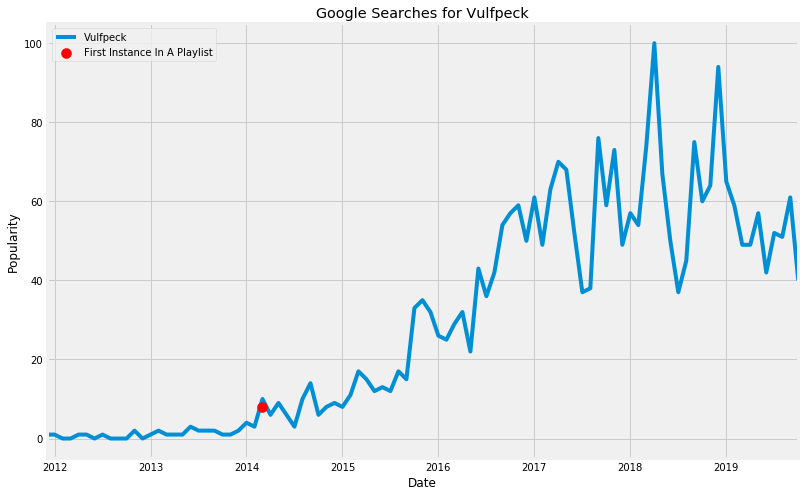

In [56]:
# Search for earliest date an artist was added to one of my playlists
track_id = ((mps_df[mps_df['Primary Artist'].str.contains("Vulfpeck")]).tail(1).index[0])
artist_name = mps_df.iloc[track_id]['Primary Artist']
discovery_date = mps_df.iloc[track_id]['Added At']

# Call Pytrends API
kw_list = [artist_name]
pytrends.build_payload(kw_list, cat=3, timeframe='2011-12-01 2019-10-15', geo='', gprop='')
trends_df = pytrends.interest_over_time()

# Create a new DataFrame of the two Pytrends dates surrounding playlist date
playlist_date_trends_df = pd.concat([(trends_df.truncate(after= discovery_date).tail(1)),(trends_df.truncate(before= discovery_date).head(1))])
playlist_date_trends_df.reset_index(inplace=True)

# Calculate popularity on the date added
month_length = (playlist_date_trends_df.iloc[1]['date']) - (playlist_date_trends_df.iloc[0]['date'])
day_of_month_added = int(mps_df.iloc[track_id]['Added At'][8:10])
total_change_over_month = (playlist_date_trends_df.iloc[1][artist_name]) - (playlist_date_trends_df.iloc[0][artist_name])
change_per_day = total_change_over_month / month_length.days
change_until_playlist = change_per_day * day_of_month_added
popularity_when_playlisted = (playlist_date_trends_df.iloc[0][artist_name]) + change_until_playlist

# Plot Line Chart and Marker
trends_df.plot(figsize=(12,8),zorder=1)
plt.scatter(discovery_date, popularity_when_playlisted, color='red',label='First Instance In A Playlist', s=100,zorder=2)
plt.legend()
plt.title(F'Google Searches for {artist_name}')
plt.xlabel('Date')
plt.ylabel('Popularity')

## Cleaning Data For Analysis
* There are some throwback favorites in these playlists, but for the most part, I try to add music to these monthly playlists when I come across it for the first time

Text(0, 0.5, 'Number of Tracks')

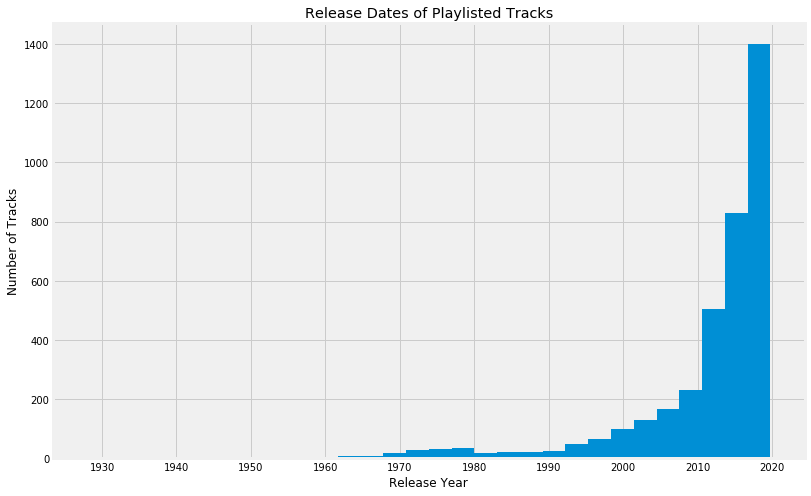

In [9]:
mps_df['Release Date'].astype('datetime64').hist(bins=30,figsize=(12,8))
plt.title("Release Dates of Playlisted Tracks")
plt.xlabel("Release Year")
plt.ylabel("Number of Tracks")

### Average Time Between Discovery and Playlisting
* With outliers from the years before I was using Spotify, the average time between a track release and its appearance in one of my monthly playlists is **1916 days** (about 5 years).
* When I only include tracks released after I started making these playlists, the average drops down to **283 Days** (about 9 months)

In [10]:
# Adding a column to the main DataFrame to see the time between Release Date and Date Added
mps_df['Playlist Date - Release Date'] = mps_df['Added At'].astype('datetime64') - mps_df['Release Date'].astype('datetime64')

# Fix data where Date Added precedes Release Date
mps_df.loc[mps_df['Playlist Date - Release Date'] < '0', 'Playlist Date - Release Date'] = pd.to_timedelta('0')

# Added mirrored column rounded to days as an integer (for easier sorting/graphing)
mps_df['Days Until Discovery'] = mps_df['Playlist Date - Release Date'].dt.days

In [11]:
mps_df['Playlist Date - Release Date'].mean()

Timedelta('1915 days 04:36:16.221138')

In [12]:
current_tracks_df = mps_df[mps_df['Release Date'] > '2011-12-13']

In [13]:
current_tracks_df.reset_index(drop=True)

,Primary Artist,Track Name,Popularity,Added At,Release Date,Artist ID,Track ID,Playlist Date - Release Date,Days Until Discovery
0,Robert Glasper,Endangered Black Woman [Feat. Andra Day & Stac...,40,2019-10-03T19:16:47Z,2019-10-03,5cM1PvItlR21WUyBnsdMcn,6HMZPGvQxzFFhyMJLjNQnt,0 days 19:16:47,0.0
1,Danny Brown,3 Tearz,49,2019-10-02T12:28:42Z,2019-10-01,7aA592KWirLsnfb5ulGWvU,1BMdBu6UsVCyYZ8BvTdBtw,1 days 12:28:42,1.0
2,Archy Marshall,Arise Dear Brother,42,2019-10-03T17:33:27Z,2015-12-10,2pLvihTVAElhBCw7HcrIUC,26d3GcODYXIwjxspmIWHW0,1393 days 17:33:27,1393.0
3,The Midnight Hour,Harmony,35,2019-10-18T04:56:37Z,2019-10-18,1S5jf5XWhQTMjGZQxCH0AJ,4muWswJjEaNdXZS6bnNucA,0 days 04:56:37,0.0
4,"Lee ""Scratch"" Perry",Magik,20,2019-10-03T17:41:57Z,2019-10-02,1TsG4AumsMt1Tcq2nHpov9,6LVCbj6ha72ytZbhzaiWId,1 days 17:41:57,1.0
...,...,...,...,...,...,...,...,...,...
2520,Nada Surf,When I Was Young,0,2012-02-17T03:18:57Z,2012-01-01,11zHPjHnZN0ACA50rSnTcy,0gIyOQkwo05A2BDfJ5Qwau,47 days 03:18:57,47.0
2521,Alabama Shakes,Hold On,2,2012-02-17T08:14:09Z,2012-01-31,16GcWuvvybAoaHr0NqT8Eh,7c13Xlndg43PnSzpHRD11d,17 days 08:14:09,17.0
2522,Erich Wolfgang Korngold,"Violin Concerto in D Major, Op. 35: III. Final...",0,2012-02-12T08:14:56Z,2012-02-07,3UaJz1tq0BBPzJBPgkBarb,3SICF3KhUZo1vDHjFauTSs,5 days 08:14:56,5.0
2523,Perfume Genius,All Waters,0,2012-01-26T06:53:06Z,2012-02-20,2ueoLVCXQ948OfhVvAy3Nn,4tapXj9TbKuFm0rkAl1Qjp,0 days 00:00:00,0.0


In [14]:
current_tracks_df['Playlist Date - Release Date'].mean()

Timedelta('283 days 04:11:33.769108')

### Retrieving Additional Artist Data
* As of 10/24/2019, There are at least **2306 unique artists*** represented in these **3819 tracks**.
* The original Spotify API endpoint that I called did not include Artist Popularity, Artist Followers, or Genres, so I have to make a separate call for those.

    \* There are another 61 "Primary Artist" names that do not have Spotify Artist IDs (likely because they are from local files included in the playlists), though some of those artists may already be represented by other tracks.

In [15]:
unique_artist_ids = list(filter(None, (mps_df['Artist ID'].unique()))) 

In [16]:
len(unique_artist_ids)

2306

In [17]:
unique_artist_names = list(filter(None, (mps_df['Primary Artist'].unique()))) 
len(unique_artist_names)

2367

In [18]:
artist_endpoint_data = []
artist_slice_start = 0
artist_slice_end = 49

while artist_slice_start < len(unique_artist_ids):
    
    #Call Spotify API With each of these sliced arrays
    artist_results = spotify.artists(unique_artist_ids[artist_slice_start:artist_slice_end])
    for i, item in enumerate(artist_results['artists']):        
        artist_endpoint_data.append((item['id'], item['followers']['total'], item['genres'], item['popularity']))
    
    artist_slice_start += 50
    artist_slice_end += 50

In [19]:
artists_df = pd.DataFrame(artist_endpoint_data, columns=('Artist ID', 'Followers', 'Genres','Artist Popularity'))
artists_df

,Artist ID,Followers,Genres,Artist Popularity
0,5cM1PvItlR21WUyBnsdMcn,166318,"[contemporary jazz, contemporary post-bop, ind...",58
1,7aA592KWirLsnfb5ulGWvU,474264,"[alternative hip hop, detroit hip hop, escape ...",69
2,2pLvihTVAElhBCw7HcrIUC,51161,[uk alternative hip hop],46
3,1S5jf5XWhQTMjGZQxCH0AJ,8073,[indie jazz],43
4,1TsG4AumsMt1Tcq2nHpov9,101004,"[dub, reggae, rock steady, roots reggae, ska]",54
...,...,...,...,...
2255,30DZgkaEYdezg2QMrMgrnm,140369,"[belly dance, glitch hop, world fusion]",48
2256,3U3C9o6UTYNdEsDckpRyvX,149435,"[electric bass, jazz, jazz funk, jazz fusion]",46
2257,3Ker27Wbb9OcUHGs54JIAz,267421,"[bolero, ranchera]",65
2258,3qwxSif06Qwzykdln8ZGfG,193220,"[acid jazz, electro swing, electronica, ninja,...",57


Text(0, 0.5, 'Playlisted Tracks')

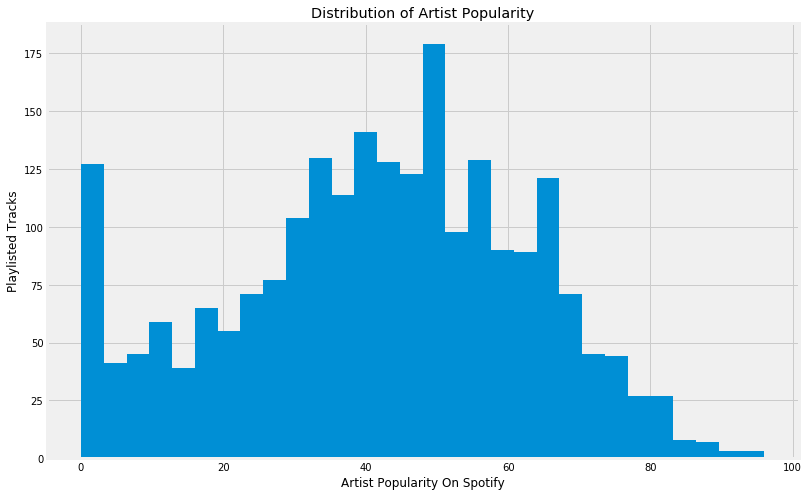

In [20]:
artists_df['Artist Popularity'].hist(bins=30,figsize=(12,8))
plt.title("Distribution of Artist Popularity")
plt.xlabel("Artist Popularity On Spotify")
plt.ylabel("Playlisted Tracks")

In [21]:
mps_artists_inner_df = pd.merge(mps_df, artists_df, on='Artist ID', how='inner')
mps_artists_inner_df.head()

,Primary Artist,Track Name,Popularity,Added At,Release Date,Artist ID,Track ID,Playlist Date - Release Date,Days Until Discovery,Followers,Genres,Artist Popularity
0,Robert Glasper,Endangered Black Woman [Feat. Andra Day & Stac...,40,2019-10-03T19:16:47Z,2019-10-03,5cM1PvItlR21WUyBnsdMcn,6HMZPGvQxzFFhyMJLjNQnt,0 days 19:16:47,0.0,166318,"[contemporary jazz, contemporary post-bop, ind...",58
1,Robert Glasper,Let Me In [Feat. Mick Jenkins],41,2019-10-03T18:55:23Z,2019-10-03,5cM1PvItlR21WUyBnsdMcn,2y91djz91Yeh9rnTRRSuL1,0 days 18:55:23,0.0,166318,"[contemporary jazz, contemporary post-bop, ind...",58
2,Robert Glasper,"All I Do [Feat. SiR, Bridget Kelly, Song Bird]",43,2019-10-03T19:32:28Z,2019-10-03,5cM1PvItlR21WUyBnsdMcn,3UBsobFiVXbqZ1hFU16gBI,0 days 19:32:28,0.0,166318,"[contemporary jazz, contemporary post-bop, ind...",58
3,Robert Glasper,Y'Outta Praise Him,28,2017-09-06T00:16:17Z,2007-01-01,5cM1PvItlR21WUyBnsdMcn,3ktd4dZe875cnP0pzK7AWr,3901 days 00:16:17,3901.0,166318,"[contemporary jazz, contemporary post-bop, ind...",58
4,Robert Glasper,G&B,29,2013-08-03T21:52:26Z,2007-01-01,5cM1PvItlR21WUyBnsdMcn,5P22GrIprYmnFZoR3P6142,2406 days 21:52:26,2406.0,166318,"[contemporary jazz, contemporary post-bop, ind...",58


In [22]:
current_artists_df = mps_artists_inner_df[mps_artists_inner_df['Release Date'] > '2011-12-13']

Text(0.5, 1.0, 'Distribution of Artist Popularity Over Discovery Time')

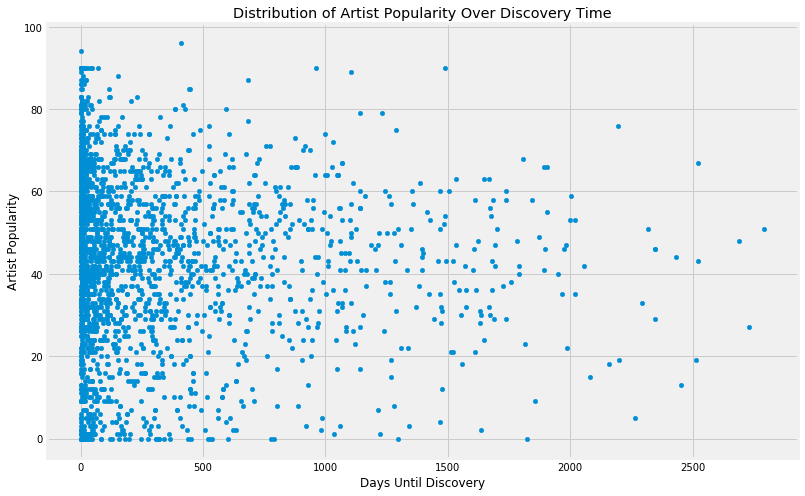

In [23]:
current_artists_df.plot.scatter(x='Days Until Discovery',y='Artist Popularity',figsize=(12,8))
plt.title("Distribution of Artist Popularity Over Discovery Time")

Text(0.5, 1.0, 'Artist Popularity vs Followers on Spotify')

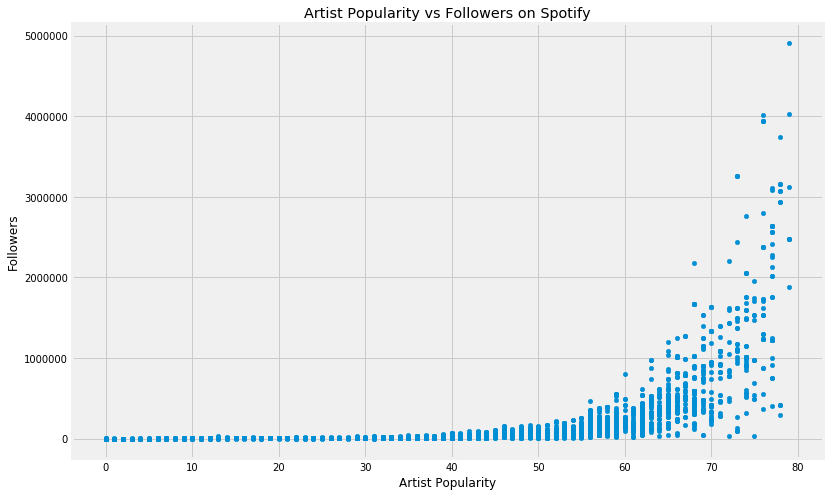

In [24]:
(mps_artists_inner_df[mps_artists_inner_df['Artist Popularity'] < 80]).plot.scatter(x='Artist Popularity',y='Followers',figsize=(12,8))
plt.title("Artist Popularity vs Followers on Spotify")

* The number of artist followers remains fairly low and static for artists with less than a popularity of 50, so this metric will not be very helpful for analysis

In [29]:
#trends_lookup_df = pd.merge(artists_df, mps_df[])
mps_df[['Primary Artist','Release Date','Added At']]

,Primary Artist,Release Date,Added At
0,Robert Glasper,2019-10-03,2019-10-03T19:16:47Z
1,Danny Brown,2019-10-01,2019-10-02T12:28:42Z
2,Archy Marshall,2015-12-10,2019-10-03T17:33:27Z
3,The Midnight Hour,2019-10-18,2019-10-18T04:56:37Z
4,"Lee ""Scratch"" Perry",2019-10-02,2019-10-03T17:41:57Z
...,...,...,...
3814,Jaco Pastorius,1981,2011-12-13T01:13:05Z
3815,Los Panchos,2011-01-01,2011-12-13T01:33:41Z
3816,Wax Tailor,2005,2011-12-13T02:12:09Z
3817,Supertramp,1979-03-29,2012-01-05T00:11:14Z


In [34]:
by_artist = mps_df.groupby('Artist ID')

In [40]:
trends_search_full_df = pd.merge(by_artist.min()[['Primary Artist','Added At','Release Date','Days Until Discovery']], artists_df, on='Artist ID', how='inner')

In [135]:
trends_search_filtered_df = trends_search_full_df[trends_search_full_df['Release Date'] > '2011-12-13']
trends_search_filtered_df

,Artist ID,Primary Artist,Added At,Release Date,Days Until Discovery,Followers,Genres,Artist Popularity
0,00sAr10UTV1JZtHqxsLVn4,Black Mountain,2018-04-13T22:23:09Z,2016-04-01,742.0,75732,"[garage rock, modern blues rock, neo-psychedel...",47
2,01QTIT5P1pFP3QnnFSdsJf,Lupe Fiasco,2017-03-03T23:18:18Z,2015-01-20,773.0,1265380,"[chicago rap, conscious hip hop, gangster rap,...",71
5,02P4gB6B5XTZuZzRmt2jkE,David Dominique,2018-12-06T22:41:03Z,2018-11-09,27.0,77,[],0
7,02nqs3YdfX7Th3gYTYFrqc,Tōth,2019-08-12T16:25:32Z,2019-05-10,94.0,3044,[],41
8,02zPEtdzUWnPToEVLRiQ7e,Madison McFerrin,2018-02-06T19:02:14Z,2018-02-02,4.0,20563,"[a cappella, alternative r&b, indie jazz, indi...",46
...,...,...,...,...,...,...,...,...
2254,7yR9zhQxEi9sc3vJxS2YG5,Jojo Abot,2019-03-15T03:56:02Z,2016-12-12,823.0,5555,[],25
2255,7ycsWk9ae4pTAlWH8j6Hf9,Matt Martians,2018-03-16T21:40:07Z,2017-01-27,413.0,46871,"[alternative r&b, indie soul]",44
2257,7zHIrsSBL7A0gEJfzv1m7z,Benjamin Clementine,2017-10-12T18:10:51Z,2017-09-15,27.0,207545,[art pop],52
2258,7zcXUc2JyOmByvlz0dlWwL,Soft Streak,2019-03-19T22:40:35Z,2019-02-15,1.0,625,[],26


In [128]:
trends_date_labels = ["2011-12-01","2012-01-01","2012-02-01","2012-03-01","2012-04-01","2012-05-01","2012-06-01","2012-07-01","2012-08-01","2012-09-01","2012-10-01","2012-11-01","2012-12-01","2013-01-01","2013-02-01","2013-03-01","2013-04-01","2013-05-01","2013-06-01","2013-07-01","2013-08-01","2013-09-01","2013-10-01","2013-11-01","2013-12-01","2014-01-01","2014-02-01","2014-03-01","2014-04-01","2014-05-01","2014-06-01","2014-07-01","2014-08-01","2014-09-01","2014-10-01","2014-11-01","2014-12-01","2015-01-01","2015-02-01","2015-03-01","2015-04-01","2015-05-01","2015-06-01","2015-07-01","2015-08-01","2015-09-01","2015-10-01","2015-11-01","2015-12-01","2016-01-01","2016-02-01","2016-03-01","2016-04-01","2016-05-01","2016-06-01","2016-07-01","2016-08-01","2016-09-01","2016-10-01","2016-11-01","2016-12-01","2017-01-01","2017-02-01","2017-03-01","2017-04-01","2017-05-01","2017-06-01","2017-07-01","2017-08-01","2017-09-01","2017-10-01","2017-11-01","2017-12-01","2018-01-01","2018-02-01","2018-03-01","2018-04-01","2018-05-01","2018-06-01","2018-07-01","2018-08-01","2018-09-01","2018-10-01","2018-11-01","2018-12-01","2019-01-01","2019-02-01","2019-03-01","2019-04-01","2019-05-01","2019-06-01","2019-07-01","2019-08-01","2019-09-01","2019-10-01"]
exception_series = pd.Series(data=np.nan,index=trends_date_labels)

In [129]:
def get_trends(x):
    try:
        kw_list = [x]
        pytrends.build_payload(kw_list, cat=3, timeframe='2011-12-01 2019-10-15', geo='', gprop='')
        trends_df = pytrends.interest_over_time()
        return trends_df[x]
    except:
        return exception_series

In [130]:
mps_artists_trends = trends_search_filtered_df['Primary Artist'].apply(get_trends)
mps_artists_trends.reset_index(drop=True,inplace=True)

In [56]:
mps_artists_trends = pd.read_csv('/Users/griffinboyd/App-Serve/artist-popularity-eda/csvs/mps_artists_trends.csv')

In [67]:
mps_artists_trends

,2011-12-01,2012-01-01,2012-02-01,2012-03-01,2012-04-01,2012-05-01,2012-06-01,2012-07-01,2012-08-01,2012-09-01,...,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01
0,77.0,76.0,67.0,67.0,69.0,77.0,66.0,77.0,78.0,72.0,...,59.0,48.0,49.0,49.0,52.0,53.0,51.0,60.0,54.0,52.0
1,53.0,41.0,37.0,32.0,32.0,37.0,38.0,41.0,56.0,100.0,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0
2,53.0,70.0,76.0,75.0,67.0,100.0,68.0,57.0,50.0,77.0,...,55.0,32.0,51.0,32.0,38.0,34.0,22.0,20.0,20.0,29.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.0,0.0,0.0,0.0,0.0,0.0,88.0,88.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,4.0,...,15.0,12.0,8.0,6.0,18.0,21.0,13.0,22.0,26.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,...,15.0,14.0,36.0,5.0,7.0,10.0,18.0,10.0,7.0,7.0
1395,26.0,24.0,28.0,76.0,79.0,64.0,19.0,30.0,26.0,11.0,...,6.0,9.0,12.0,85.0,43.0,21.0,8.0,20.0,8.0,10.0
1396,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,9.0,7.0,16.0,11.0,21.0,15.0,10.0,7.0,7.0,7.0
1397,0.0,0.0,0.0,75.0,77.0,74.0,0.0,74.0,73.0,0.0,...,40.0,0.0,0.0,41.0,39.0,82.0,0.0,81.0,0.0,0.0


In [8]:
popularity_df = pd.read_csv('/Users/griffinboyd/App-Serve/artist-popularity-eda/csvs/popularity_df.csv')

In [53]:
max_popularity = mps_artists_trends.idxmax(axis = 1)

In [157]:
popularity_df = trends_search_filtered_df.merge(max_popularity.rename('First Popularity Peak'), left_index=True, right_index=True)
popularity_df.reset_index(drop=True,inplace=True)

In [63]:
popularity_df

,Artist ID,Primary Artist,Added At,Release Date,Days Until Discovery,Followers,Genres,Artist Popularity,First Popularity Peak
0,00sAr10UTV1JZtHqxsLVn4,Black Mountain,2018-04-13T22:23:09Z,2016-04-01,742.0,75732,"['garage rock', 'modern blues rock', 'neo-psyc...",47,2016-02-01
1,01QTIT5P1pFP3QnnFSdsJf,Lupe Fiasco,2017-03-03T23:18:18Z,2015-01-20,773.0,1265380,"['chicago rap', 'conscious hip hop', 'gangster...",71,2012-09-01
2,02P4gB6B5XTZuZzRmt2jkE,David Dominique,2018-12-06T22:41:03Z,2018-11-09,27.0,77,[],0,2012-05-01
3,02nqs3YdfX7Th3gYTYFrqc,Tōth,2019-08-12T16:25:32Z,2019-05-10,94.0,3044,[],41,2015-11-01
4,02zPEtdzUWnPToEVLRiQ7e,Madison McFerrin,2018-02-06T19:02:14Z,2018-02-02,4.0,20563,"['a cappella', 'alternative r&b', 'indie jazz'...",46,2016-06-01
...,...,...,...,...,...,...,...,...,...
1394,7yR9zhQxEi9sc3vJxS2YG5,Jojo Abot,2019-03-15T03:56:02Z,2016-12-12,823.0,5555,[],25,2017-01-01
1395,7ycsWk9ae4pTAlWH8j6Hf9,Matt Martians,2018-03-16T21:40:07Z,2017-01-27,413.0,46871,"['alternative r&b', 'indie soul']",44,2017-02-01
1396,7zHIrsSBL7A0gEJfzv1m7z,Benjamin Clementine,2017-10-12T18:10:51Z,2017-09-15,27.0,207545,['art pop'],52,2015-01-01
1397,7zcXUc2JyOmByvlz0dlWwL,Soft Streak,2019-03-19T22:40:35Z,2019-02-15,1.0,625,[],26,2015-01-01


In [212]:
def estimate_popularity(x):
    try:
        discovery_date = popularity_df.iloc[x]['Added At']
        item_trends = mps_artists_trends.iloc[x]
        boundary_dates = pd.concat([(item_trends.truncate(after= discovery_date).tail(1)),(item_trends.truncate(before= discovery_date).head(1))])
        month_length = (datetime.strptime(boundary_dates.index[1] , '%Y-%m-%d') - datetime.strptime(boundary_dates.index[0] , '%Y-%m-%d')).days
        day_of_month_added = int(discovery_date[8:10])
        total_change_over_month = boundary_dates.iloc[1] - boundary_dates.iloc[0]
        change_per_day = total_change_over_month / month_length
        change_until_playlist = change_per_day * day_of_month_added
        popularity_when_playlisted = (boundary_dates.iloc[0]) + change_until_playlist
        return popularity_when_playlisted
    except:
        return np.nan

In [215]:
popularity_df.reset_index(inplace=True)

In [216]:
discovery_popularity_df = popularity_df['index'].apply(estimate_popularity)

In [ ]:
discovery_popularity_merged_df = popularity_df.merge(max_popularity.rename('First Popularity Peak'), left_index=True, right_index=True)
popularity_df.reset_index(drop=True,inplace=True)

In [217]:
discovery_popularity_df

0       53.533333
1       10.000000
2       37.258065
3       53.935484
4       25.428571
          ...    
1394    21.000000
1395    15.225806
1396    43.548387
1397    25.129032
1398    44.129032
Name: index, Length: 1399, dtype: float64

# To Do

* Filter out noise in PyTrends DataFrame - drop rows with minimal popularity and/or no genre tags

Questions:
1. Did the artist increase in popularity after my playlisting?
    * Get popularity on discovery date (red dot from Vulfpeck example)

* Calculations to consider:
    * Which artists have wound up more popular after I playlisted?
    * What are the artists with the most popularity growth? (sort/display?)
    * What is the average popularity difference between discovery and now?
        * What about between discovery and each artist's subsequent popularity peak?
    * Which genres am I best at predicting buzz for?

In [41]:
#[element for list_ in s for element in list_]

all_genres = pd.DataFrame(artists_df['Genres'].sum())

In [49]:
grouped_genres = all_genres[0].value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

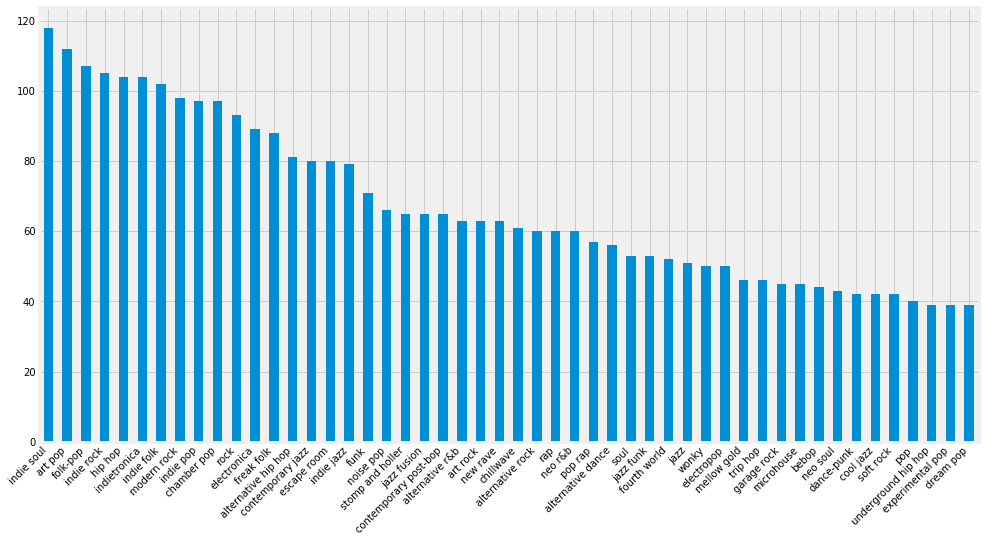

In [96]:
grouped_genres.head(50).plot.bar(figsize=(15,8))
plt.xticks(rotation=45,ha="right")

In [80]:
grouped_genres

indie soul            118
art pop               112
folk-pop              107
indie rock            105
hip hop               104
                     ... 
indie fuzzpop           1
arkansas country        1
charlotte nc indie      1
strut                   1
peruvian rock           1
Name: 0, Length: 1067, dtype: int64

In [32]:
selection = ['wonky']
genre_mask = mps_artists_inner_df['Genres'].apply(lambda x: any(item for item in selection if item in x))
mps_artists_inner_df[genre_mask]

,Primary Artist,Track Name,Popularity,Added At,Release Date,Artist ID,Track ID,Playlist Date - Release Date,Days Until Discovery,Followers,Genres,Artist Popularity
294,Taylor McFerrin,As You Are,28,2019-08-19T16:43:05Z,2019-08-16,0yLmsf6RBPYqm6hvFJCPg6,38e8YtZvfUjWoC4xA76qiQ,3 days 16:43:05,3.0,42881,"[alternative r&b, indie jazz, indie soul, neo ...",49
295,Taylor McFerrin,Love and Distance,37,2019-08-09T05:25:02Z,2019-08-09,0yLmsf6RBPYqm6hvFJCPg6,1QfjnqVZCaeXkEMdyTbG0T,0 days 05:25:02,0.0,42881,"[alternative r&b, indie jazz, indie soul, neo ...",49
296,Taylor McFerrin,Memory Digital (feat. Anna Wise),27,2019-08-02T04:22:42Z,2019-07-26,0yLmsf6RBPYqm6hvFJCPg6,0oDKVL14sI8k7yYt2qOBFU,7 days 04:22:42,7.0,42881,"[alternative r&b, indie jazz, indie soul, neo ...",49
297,Taylor McFerrin,Now That You Need Me,26,2019-07-12T16:34:06Z,2019-07-12,0yLmsf6RBPYqm6hvFJCPg6,7hlQLoAukbrAB8GyrQaPf7,0 days 16:34:06,0.0,42881,"[alternative r&b, indie jazz, indie soul, neo ...",49
298,Taylor McFerrin,Stepps,0,2014-07-16T14:00:42Z,2014-06-10,0yLmsf6RBPYqm6hvFJCPg6,4g5APMTAIIs2UiAXzma6cp,36 days 14:00:42,36.0,42881,"[alternative r&b, indie jazz, indie soul, neo ...",49
...,...,...,...,...,...,...,...,...,...,...,...,...
3334,Lone,New Colour,0,2013-07-24T20:44:48Z,2012-05-06,5wZOrGWdg4hq7KIRMupJdI,2uBAU6W0JrENlJUemQksDv,444 days 20:44:48,444.0,57039,"[bass music, deep house, downtempo, electronic...",48
3409,Gold Panda,Marriage,0,2013-08-13T04:14:58Z,2011-04-16,6xS3zemJD9h94iueQvGqVk,4uXDg0hAajiJkaFhorPQfJ,850 days 04:14:58,850.0,162529,"[bass music, chillwave, electronica, future ga...",49
3410,Onra,L.O.V.E.,0,2013-08-13T04:15:33Z,2012-06-12,2sAlo7Fey5cqBk5WJILSd8,6LMceDtrIjQUdxM1MW3d9x,427 days 04:15:33,427.0,96798,"[alternative hip hop, chillhop, japanese chill...",53
3467,Sweet Valley,Where Will I Go,0,2013-01-16T22:23:19Z,2012-09-25,0Rh2F37PiLjhYaERywNulu,0WB1U2gQPrkCEHy2skpgep,113 days 22:23:19,113.0,18162,[wonky],39
